<a href="https://colab.research.google.com/github/kelseymatsik/project_chd/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
! git clone https://www.github.com/kelseymatsik/project_chd

fatal: destination path 'project_chd' already exists and is not an empty directory.


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
df = pd.read_csv('/content/drive/My Drive/Spring 2024/DS 3001/cleaned_chd.csv', index_col=0)
df.head()

,sex,age,education,cigsPerDay,currentSmoker,BPMeds,stroke,hypertensive,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,tenYearRisk
0,1.0,58.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,143.0,104.0,29.85,75.0,87.000000,1.0
1,0.0,40.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,199.0,122.0,82.0,22.16,85.0,77.000000,0.0
2,0.0,52.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,112.0,71.0,25.68,80.0,77.333333,0.0
3,1.0,38.0,2.0,1.0,43.0,0.0,0.0,1.0,0.0,170.0,130.0,94.0,23.90,110.0,75.000000,0.0
4,0.0,43.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,124.0,92.0,21.26,75.0,74.000000,0.0


In [135]:
df.loc[:,['glucose', 'education'] ].groupby('education').describe()

glucose                                                            \
            count       mean        std   min     25%        50%        75%   
education                                                                     
1.000000   1291.0  80.537051  12.152678  63.0  72.000  78.000000  87.000000   
1.166667      3.0  79.222222   3.892062  75.0  77.500  80.000000  81.333333   
1.333333      9.0  76.666667  13.883443  63.0  67.000  76.000000  78.000000   
1.500000      8.0  88.875000  11.767844  78.5  79.750  85.250000  93.250000   
1.666667      8.0  81.500000   9.023778  66.0  74.500  85.500000  87.250000   
1.833333      5.0  83.000000   8.514693  71.0  80.000  83.000000  87.000000   
2.000000    958.0  80.163535  11.679713  63.0  72.000  78.000000  86.000000   
2.166667     10.0  74.000000   7.803133  63.0  69.250  75.000000  77.250000   
2.333333     10.0  81.150000  13.497245  69.0  72.375  77.833333  80.000000   
2.500000      7.0  83.000000  10.535654  63.0  79.000  87.000000  90.000000   
2.666667      7.0  76.571429  10.341778  64.0  70.500  73.000000  81.500000   
3.000000    489.0  79.209952  11.316832  63.0  71.000  78.000000  86.000000   
3.333333      1.0  63.000000        NaN  63.0  63.000  63.000000  63.000000   
4.000000    337.0  79.343225  11.345876  63.0  71.000  77.000000  85.000000   

                       
                  max  
education              
1.000000   108.000000  
1.166667    82.666667  
1.333333   103.000000  
1.500000   108.000000  
1.666667    92.000000  
1.833333    94.000000  
2.000000   108.000000  
2.166667    87.000000  
2.333333   108.000000  
2.500000    93.000000  
2.666667    95.000000  
3.000000   108.000000  
3.333333    63.000000  
4.000000   108.000000

<ipython-input-136-008b71994fe2>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df['glucose'], hue=df['education'])


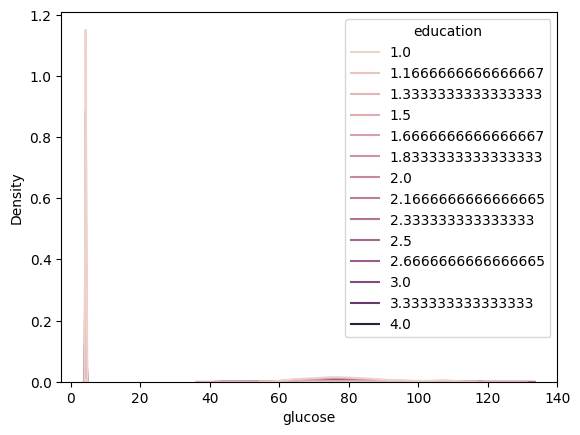

<ipython-input-136-008b71994fe2>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=np.log(df['glucose']), hue=df['education'])


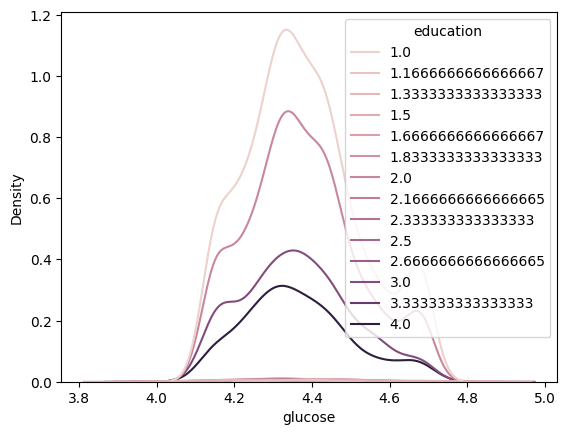

In [136]:
sns.kdeplot(x=np.log(df['glucose']), hue=df['education'], warn_singular=False)

sns.kdeplot(x=df['glucose'], hue=df['education'])
plt.show()

sns.kdeplot(x=np.log(df['glucose']), hue=df['education'])
plt.show()

In [137]:
y = df['glucose']
X = pd.get_dummies(df['education'], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(X, y)

results = pd.DataFrame({'variable': X.columns, 'coefficient': reg.coef_})
print(results)

    variable  coefficient
0   1.000000    80.537051
1   1.166667    79.222222
2   1.333333    76.666667
3   1.500000    88.875000
4   1.666667    81.500000
5   1.833333    83.000000
6   2.000000    80.163535
7   2.166667    74.000000
8   2.333333    81.150000
9   2.500000    83.000000
10  2.666667    76.571429
11  3.000000    79.209952
12  3.333333    63.000000
13  4.000000    79.343225


In [158]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

train_data = pd.read_csv('/content/drive/My Drive/Spring 2024/DS 3001/cleaned_chd.csv', index_col=0)
test_data = pd.read_csv('./project_chd/fhs_test.csv')

X_train = train_data[['sysBP', 'diaBP']]
y_train = train_data['glucose']
X_test = test_data[['sysBP', 'diaBP']]
y_test = test_data['glucose']

imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)

missing_indices = y_test[y_test.isnull()].index

X_test_imputed = np.delete(X_test_imputed, missing_indices, axis=0)
y_test = y_test.dropna()

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test_imputed)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE on the test set:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 score on the test set:", r2)

RMSE on the test set: 24.68357276180324
R2 score on the test set: 0.01877700056496623


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
